# Baseball Case Study

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Uploading the the data set

In [2]:
data =pd.read_csv('BaseBalls.csv')

In [3]:
data=pd.DataFrame(data=data)
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [16]:
#get new column names
names = ["wins", "Runs", "At Bats", "Hits","Doubles",'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average','Complete Games','Shutouts', 'Saves', 'Errors'] 
#rename columns
data = data.rename(columns=dict(zip(data.columns, names))) 
data.head()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA

In [17]:
#Checking data type
data.shape

(30, 17)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

There are 30 rows and 17 columns, All variables are numeric. arget varibale is continous and interger type.


In [19]:
data.isnull().sum()

wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

There is no missing values

<AxesSubplot:>

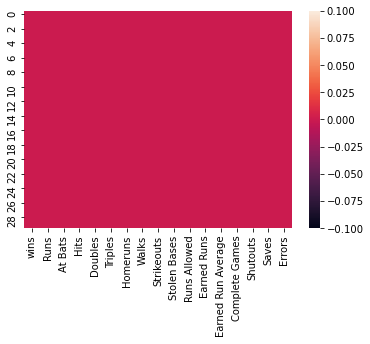

In [20]:
sns.heatmap(data.isnull())

The heat map also shows There is no missing values

In [21]:
data.describe()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key Observations: 1) There is no much diffence between 50% and 'Min' values for most of the columns. There is large diffenrce between 75% and Max values for some of the columns. This shows there is posibilty of outliers in the above mentioned columns.
                2) In some of the variables there is high standard deviation observed.

<Figure size 432x288 with 0 Axes>

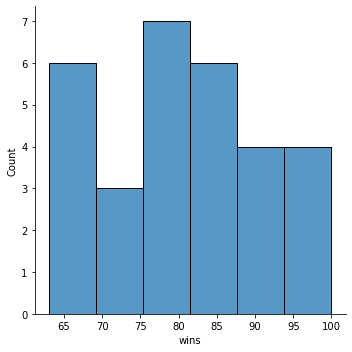

<Figure size 432x288 with 0 Axes>

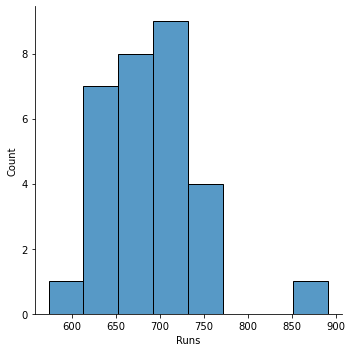

<Figure size 432x288 with 0 Axes>

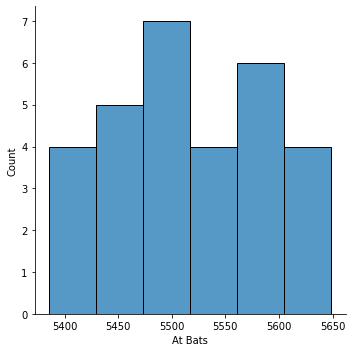

<Figure size 432x288 with 0 Axes>

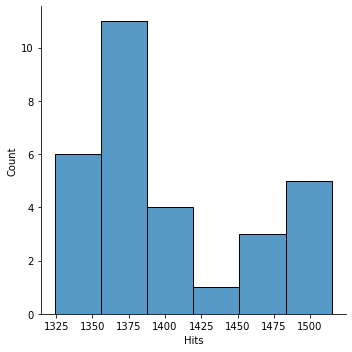

<Figure size 432x288 with 0 Axes>

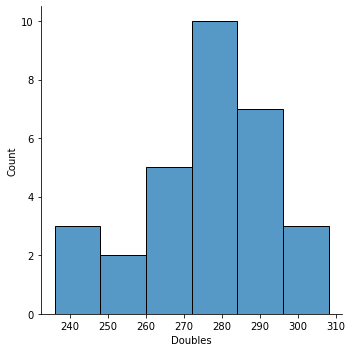

<Figure size 432x288 with 0 Axes>

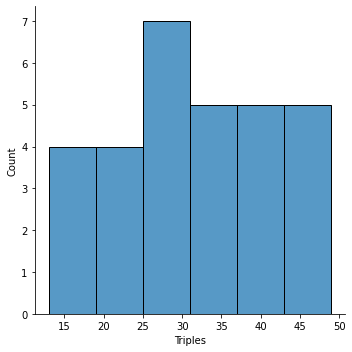

<Figure size 432x288 with 0 Axes>

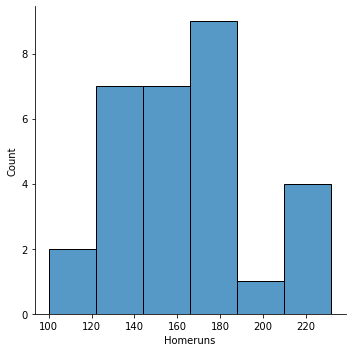

<Figure size 432x288 with 0 Axes>

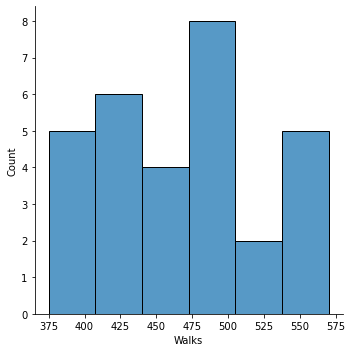

<Figure size 432x288 with 0 Axes>

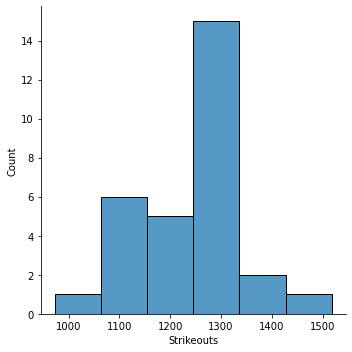

<Figure size 432x288 with 0 Axes>

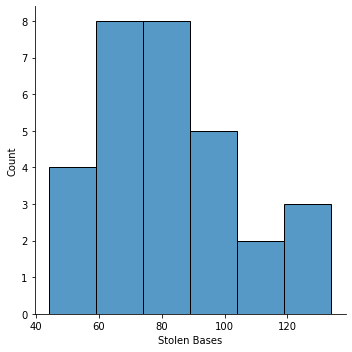

<Figure size 432x288 with 0 Axes>

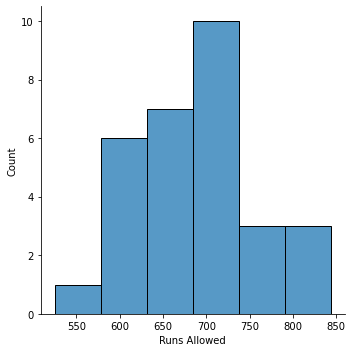

<Figure size 432x288 with 0 Axes>

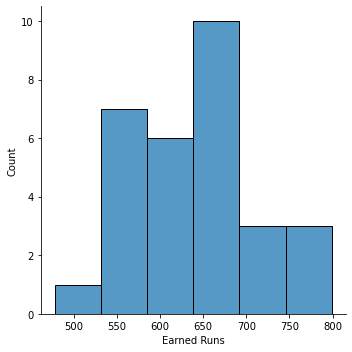

<Figure size 432x288 with 0 Axes>

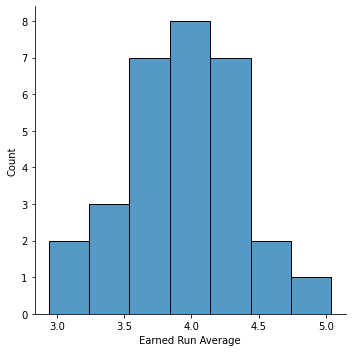

<Figure size 432x288 with 0 Axes>

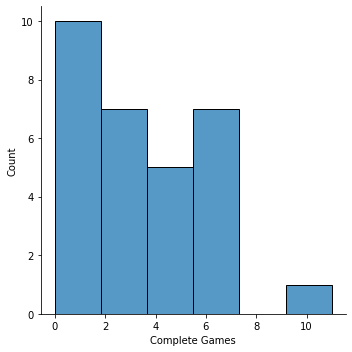

<Figure size 432x288 with 0 Axes>

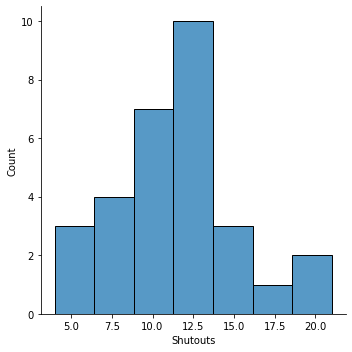

<Figure size 432x288 with 0 Axes>

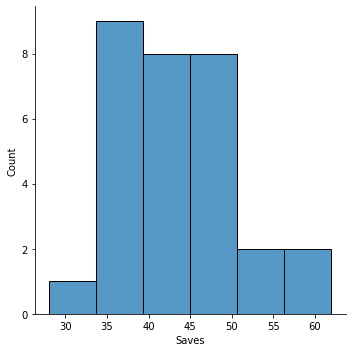

<Figure size 432x288 with 0 Axes>

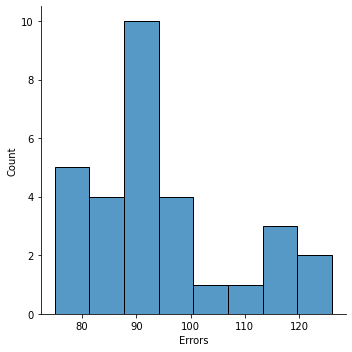

In [24]:
# ploting graph for alll the coulmns in one go
columns=["wins", "Runs", "At Bats", "Hits","Doubles",'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average','Complete Games','Shutouts', 'Saves', 'Errors']
for i in data[columns]:
    plt.figure()
    sns.displot(data[i])

There is intersting pattern here that Earned Run(ERA)  is normally distributed and other variables are postively skewed.

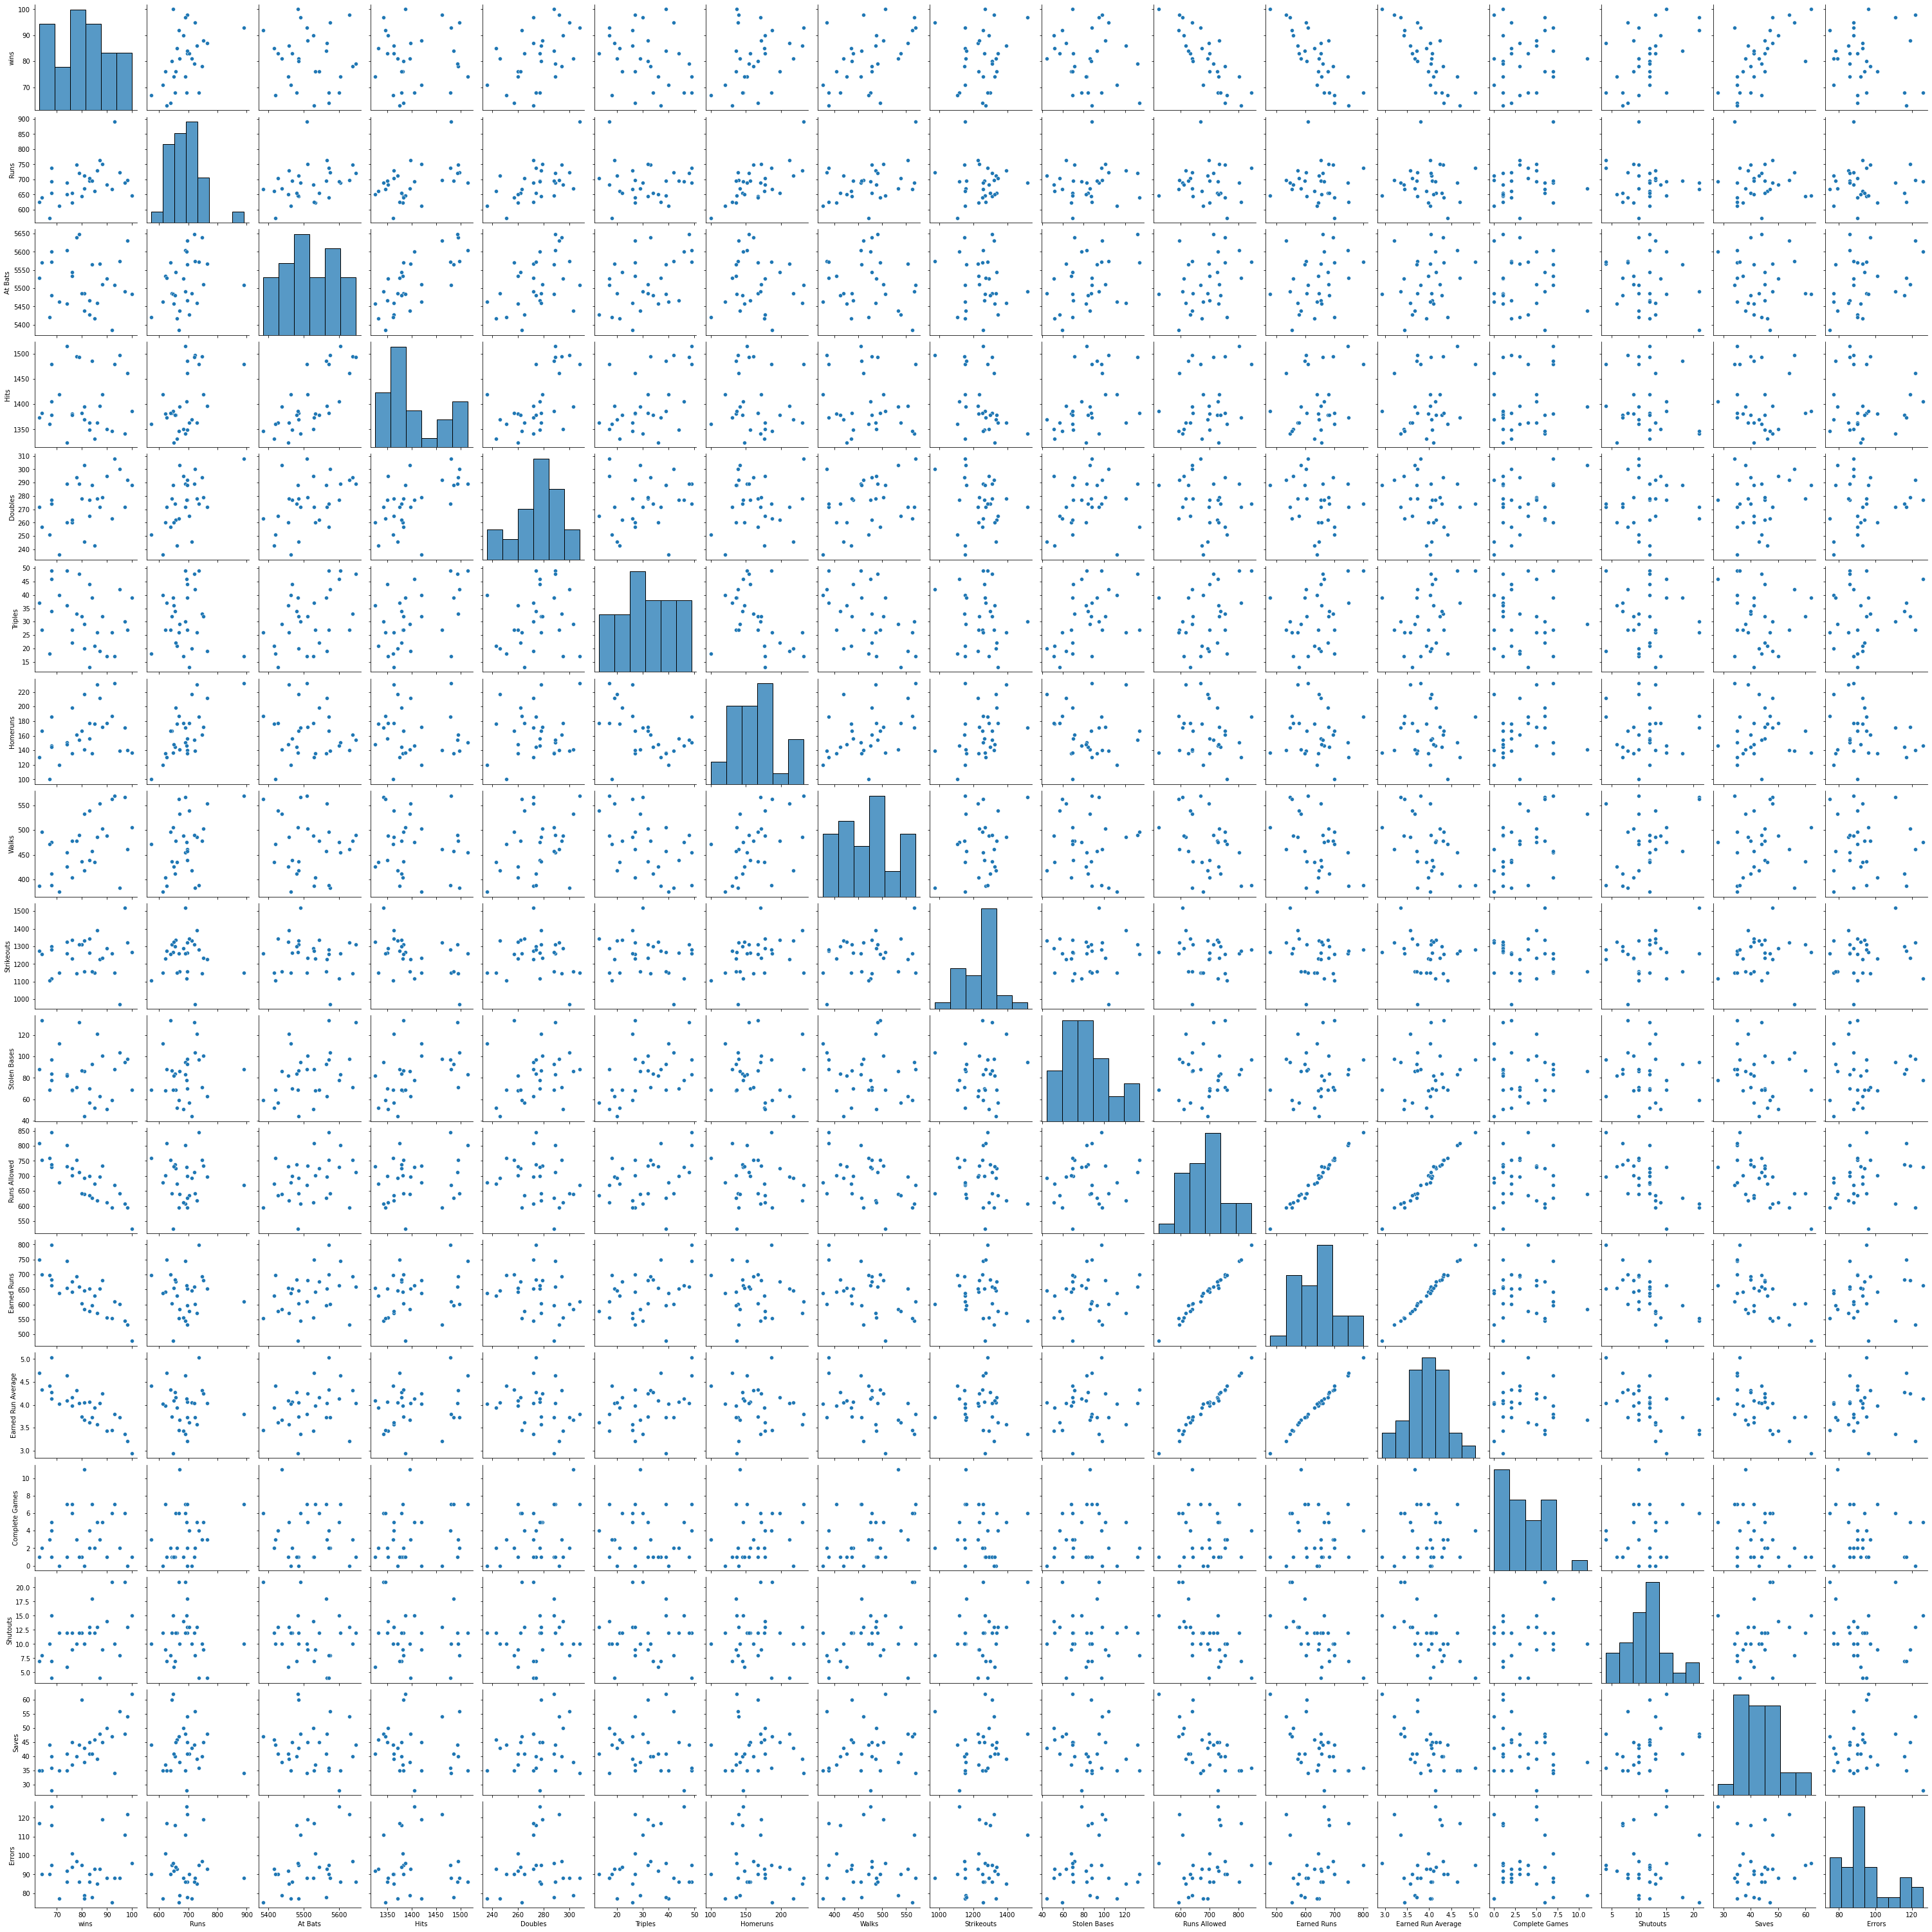

In [23]:
sns.pairplot(data)

Key Observations: The wins and runs shows some positive correlation.
                  2)Wins and save has positve correlation.ERA have some correlation with wins.
                3) Runs and walks have some relationship.

<AxesSubplot:>

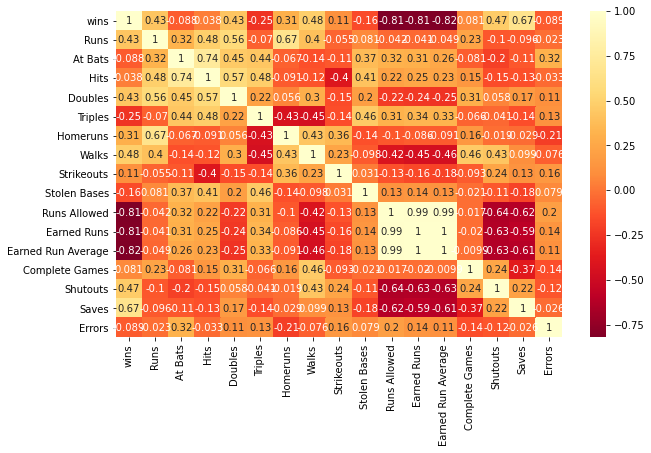

In [25]:
dfcor=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

Analyzing the correlation matrix, we notice that Saves,Shutouts, walks,runs,doubles,ERA,ER and runs allowed are the attributes that most correlates to wins. Therefore, we concentrated the multivariate analysis on the correlation of these  attributes with wins:

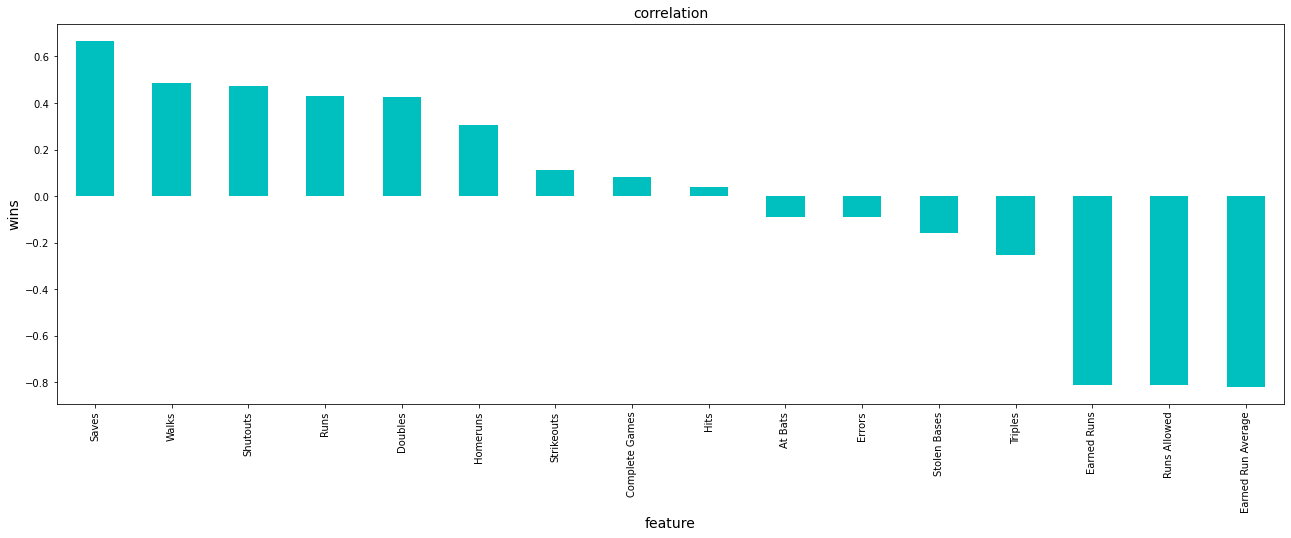

In [26]:
plt.figure(figsize=(22,7))
data.corr()['wins'].sort_values(ascending=False).drop(['wins']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('wins',fontsize=14)
plt.title('correlation',fontsize =14)
plt.show()

Key observations: 1)Hits, at bats,errors, stolen bases are least correlated to wins.
    2)ERA, Runs alloed, earned runs are negatively correlated to wins.
    3)Saves, Walks, Runs, Doubles are positvely correlated

<Figure size 1440x360 with 0 Axes>

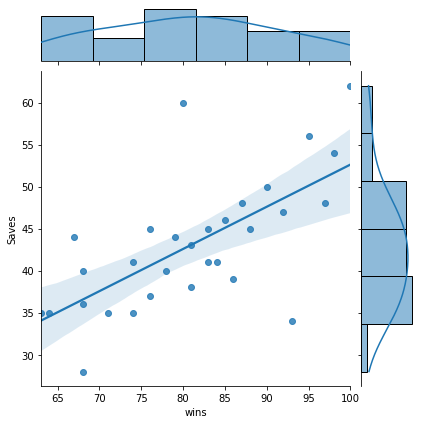

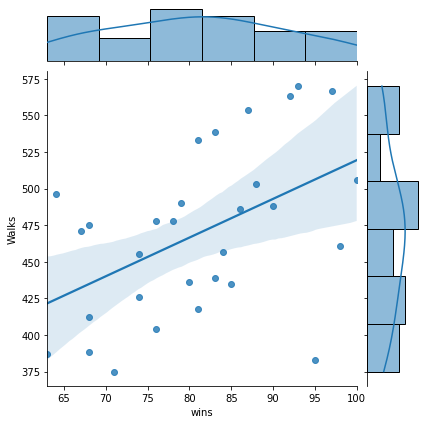

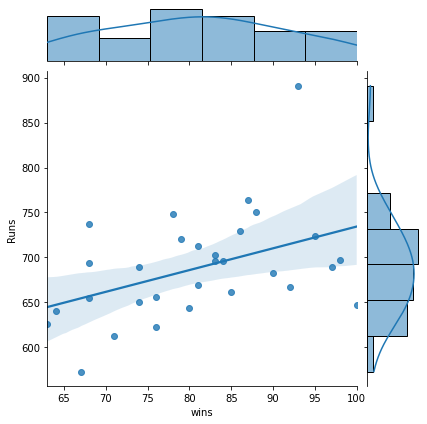

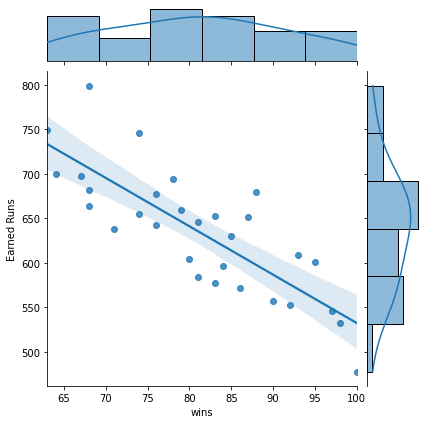

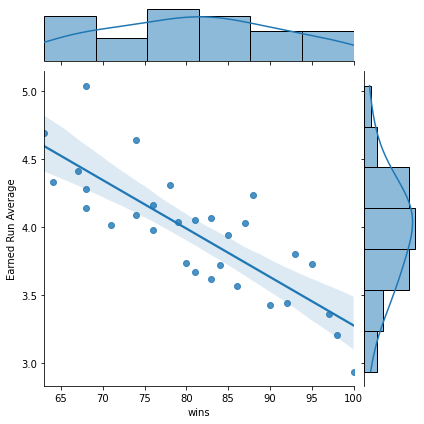

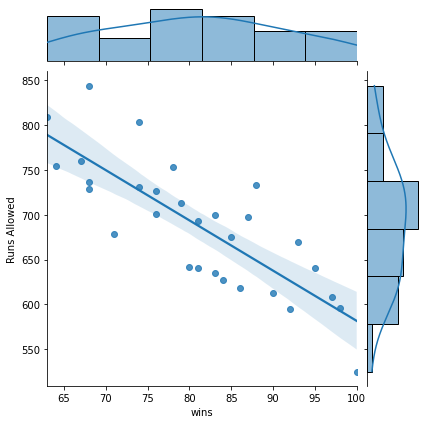

In [29]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=data, x='wins', y='Saves', kind='reg')
_ = sns.jointplot(data=data, x='wins', y='Walks', kind='reg')
_ = sns.jointplot(data=data, x='wins', y='Runs', kind='reg')
_ = sns.jointplot(data=data, x='wins', y='Earned Runs', kind='reg')
_ = sns.jointplot(data=data, x='wins', y='Earned Run Average', kind='reg')
_ = sns.jointplot(data=data, x='wins', y='Runs Allowed', kind='reg')

1)ERA, Runs alloed, earned runs are negatively correlated to wins. 2)Saves, Walks, Runs, Doubles are positvely correlate

# Finding the outliers and Skewness

wins                     AxesSubplot(0.125,0.125;0.0383663x0.755)
Runs                   AxesSubplot(0.17104,0.125;0.0383663x0.755)
At Bats               AxesSubplot(0.217079,0.125;0.0383663x0.755)
Hits                  AxesSubplot(0.263119,0.125;0.0383663x0.755)
Doubles               AxesSubplot(0.309158,0.125;0.0383663x0.755)
Triples               AxesSubplot(0.355198,0.125;0.0383663x0.755)
Homeruns              AxesSubplot(0.401238,0.125;0.0383663x0.755)
Walks                 AxesSubplot(0.447277,0.125;0.0383663x0.755)
Strikeouts            AxesSubplot(0.493317,0.125;0.0383663x0.755)
Stolen Bases          AxesSubplot(0.539356,0.125;0.0383663x0.755)
Runs Allowed          AxesSubplot(0.585396,0.125;0.0383663x0.755)
Earned Runs           AxesSubplot(0.631436,0.125;0.0383663x0.755)
Earned Run Average    AxesSubplot(0.677475,0.125;0.0383663x0.755)
Complete Games        AxesSubplot(0.723515,0.125;0.0383663x0.755)
Shutouts              AxesSubplot(0.769554,0.125;0.0383663x0.755)
Saves     

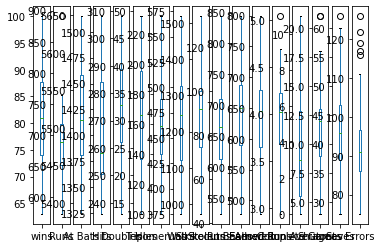

In [31]:
# Box plot for all coulmns
data.plot(kind='box',subplots=True,layout=(1,17))

We can see there si outliers present in most of the variabels.Lets see some of the variables seprately

<AxesSubplot:>

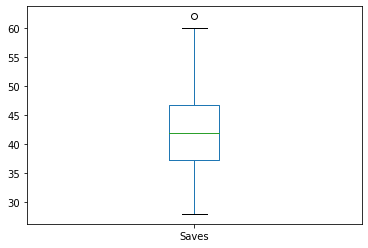

In [32]:
data['Saves'].plot.box()

<AxesSubplot:>

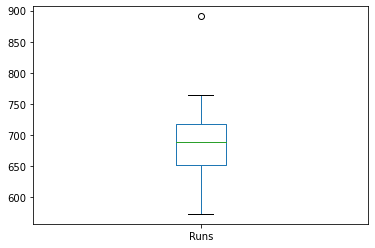

In [35]:
data['Runs'].plot.box()

<AxesSubplot:>

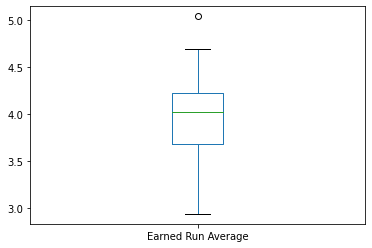

In [37]:
data['Earned Run Average'].plot.box()

We can depict from the above figure that there are outliers in some of  the columns, however we are not going to remove from Target variable.

In [42]:
# Checking Skewness
data.skew()

wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there are skweness in most of the columns. columns.Lets reduce the skewness from above features like: runs, Hits,Complete Games and Saves.

# Removing Outliers and Skewness

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [77]:
# lets check the presence of outlier
print('shape before remooving the outliers:',data.shape)
dsnew=data[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here one row will be droped

shape before remooving the outliers: (29, 17)
shape after remooving the outliers: (29, 17)


In [78]:
data=dsnew

In [79]:
dsnew.skew()

wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.746079
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games       -0.260678
Shutouts              0.526943
Saves                 0.370280
Errors                0.840271
dtype: float64

<AxesSubplot:xlabel='Hits', ylabel='Count'>

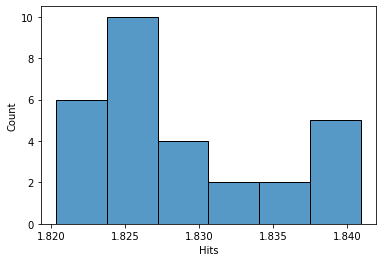

In [103]:
dsnew['Hits']=np.sqrt(dsnew['Hits'])
sns.histplot(dsnew['Hits'])

<AxesSubplot:xlabel='Complete Games', ylabel='Count'>

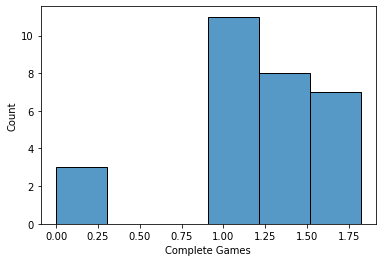

In [104]:
dsnew['Complete Games']=np.sqrt(dsnew['Complete Games'])
sns.histplot(dsnew['Complete Games'])

<AxesSubplot:xlabel='Saves', ylabel='Count'>

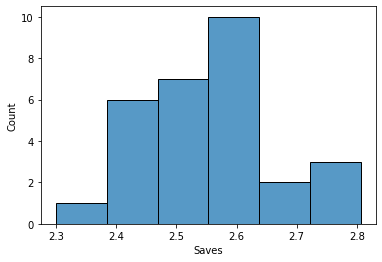

In [105]:
dsnew['Saves']=np.sqrt(dsnew['Saves'])
sns.histplot(dsnew['Saves'])

In [106]:
dsnew.skew()

wins                  0.119013
Runs                 -0.215364
At Bats               0.169573
Hits                  0.742256
Doubles              -0.335304
Triples               0.090124
Homeruns              0.450862
Walks                 0.151193
Strikeouts           -0.233815
Stolen Bases          0.494966
Runs Allowed          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Games       -1.526584
Shutouts              0.526943
Saves                 0.235614
Errors                0.840271
dtype: float64

In [109]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dsnew)
x=pd.DataFrame(x,columns=dsnew.columns)
x

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,1.416025,0.959398,0.830084,1.724955,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,0.005269,-0.813262,1.578599,-0.471091
1,0.239947,0.331147,-0.702831,-0.948933,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.005269,0.159299,0.277160,-0.614898
2,0.043934,-0.274666,-1.100253,-0.090195,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.358886,-0.326982,-0.681373,-1.118222
3,-0.446099,-1.329231,0.233951,-0.348768,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,0.942096,-0.570122,-0.828896,0.463653
4,-0.642112,0.174084,1.255894,2.033448,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.942096,0.159299,-1.133156,-0.614898
5,0.631973,1.856900,0.716535,-0.053451,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.277013,-1.785822,0.653862,-0.111574
6,0.043934,0.712585,-0.447345,-0.553623,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-2.541962,-0.326982,0.015428,-1.262029
7,-0.054073,-0.835605,-0.447345,-0.311682,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.400004,0.159299,2.004167,0.032233
8,-0.250086,1.497899,1.752672,1.690468,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.277013,-0.326982,-0.394849,0.176039
9,0.729980,1.565212,-0.078310,0.347588,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.661012,-0.570122,0.277160,1.757915


In [110]:
x.shape

(29, 17)

Creating feature and target dataframe

In [111]:
x=data.drop(columns=['wins'])
y=data['wins']

In [112]:
# To find the best random state using Linear Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod= LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.8961282207318354 on random state 50


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 16)
(9, 16)
(20,)
(9,)


70% of the data (20 rows) will be available for training the model & 30% (9 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [114]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.9384285443620995

In [115]:
lm.coef_

array([ 1.72807493e-01, -8.92232335e-02,  4.88779639e+02, -9.67877999e-02,
       -5.70312862e-02, -8.23642473e-02, -4.54153583e-02,  1.89074659e-03,
       -1.08606433e-02,  1.58530798e-01,  5.04599664e-01, -1.15048626e+02,
        2.86784207e+00,  2.41705327e-01,  2.60133775e+01,  2.26739631e-02])

In [116]:
lm.intercept_

-427.1695782150611

In [117]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute arror',mean_absolute_error(y_test,pred))
print('mean squarred arror',mean_squared_error(y_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8961282207318354
mean absolute arror 3.2947334108324577
mean squarred arror 14.906241508804268
Root mean square arror 3.860860203219519


In [118]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

1.0

In [119]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.18857536132140396
mean absolute error 8.444444444444445
mean squarred error 116.44444444444444
Root mean square error 10.790942704159097


In [120]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.44768856447688565

In [121]:
from sklearn.metrics import r2_score
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.49648313833448043
mean absolute error 7.555555555555555
mean squarred error 72.25777777777778
Root mean square error 8.50045750402752


In [122]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9090963967095355

In [123]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.7143857278045423
mean absolute error 5.203333333333333
mean squarred error 40.9874111111111
Root mean square error 6.402141134894723


Based on the results of above models, and capomaring the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Linear regression model is best model to predict the wins.

Since the Linear Regression model has the second hishest score(0.98) and R2 score(0.81) and lowest values of MAE, MSE,RMSE , it is the best model among the above four models

# Improving the model accuracy using cross Validation

In [124]:
from sklearn.model_selection import cross_val_score
gnbscores =cross_val_score(lm,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[ 0.44276231 -0.43990116  0.61280301 -0.53096834 -0.68697275]
-0.12045538516277879 0.5378457909720672


In [125]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[-1.34886364 -8.76315789  0.34588038  0.39836066 -0.62146226]
-1.9978485509474946 3.4444133036949593


In [126]:
from sklearn.model_selection import cross_val_score
knscores =cross_val_score(kn,x,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[-0.65572727 -2.62052632  0.37960686  0.25554098  0.78667453]
-0.37088624351070315 1.2196403383817012


In [127]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[ 0.26505489 -5.65643553  0.47885102  0.45437082  0.86664711]
-0.7183023369510193 2.4767944638242314


# HyperParameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV 
parameter={'n_jobs':np.arange(1,10),'fit_intercept':['True', 'False']}

In [129]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [130]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [131]:
GCV.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [133]:
lm_final=LinearRegression(n_jobs=1,fit_intercept='True')
lm_final.fit(x_train,y_train)
lm_final.score(x_train,y_train)

0.9384285443620995

In [134]:
from sklearn.metrics import r2_score
pred=lm_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.8961282207318354
mean absolute error 3.2947334108324577
mean squarred error 14.906241508804268
Root mean square error 3.860860203219519


# Saving the best Model

In [135]:
import joblib
joblib.dump(lm_final,'Model_Baseball.obj')

['Model_Baseball.obj']